<a href="https://colab.research.google.com/github/Mr-big-cake/Fundamental_AI/blob/main/Lab_2/AI_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygmo
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm
from enum import Enum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Реализации

In [115]:
class Function(Enum):
  Izoma = 1
  CrossInTtray = 2
'''
Визуализация
'''
class Visualization():
  @staticmethod
  def plot(f : Function, point:list = []):
    if(f == Function.Izoma):
      Visualization.plot_Izoma(point)
    if(f == Function.CrossInTtray):
      Visualization.plot_CrossInTtray(point)

  @staticmethod
  def plot_Izoma(point:list = []):
    x = np.linspace(-5, 5, 150)
    y = np.linspace(-5, 5, 150)
    X, Y = np.meshgrid(x, y) 
    Z = Visualization.Izoma(X, Y)
    fig = plt.figure(figsize=(20,15))
    ax = fig.gca(projection='3d')
    if(len(point) != 3):
      ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='seismic', linewidth=1, antialiased=False)
    ax.plot_wireframe(X, Y, Z, color ='red',  rstride=2, cstride=2, alpha = 0.2) 
    ax.view_init(30, 45)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.set_zlabel('z', fontsize=10)
    ax.set_title('Функция Изома', fontsize=15)
    if(len(point) == 3):
      ax.scatter(point[0], point[1], point[2], linewidths  = 8 ,
               color='black', alpha = 1, label = 'Оптимум')
      ax.legend(fontsize=15, loc='lower left' )
    plt.show()
  
  @staticmethod
  def plot_CrossInTtray(point:list = []):
    x = np.linspace(-5, 5, 350)
    y = np.linspace(-5, 5, 350)
    X, Y = np.meshgrid(x, y) 
    Z = Visualization.CrossInTtray(X, Y)
    fig = plt.figure(figsize=(20,15))
    ax = fig.gca(projection='3d')
    if(len(point) != 3):
      ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='seismic', linewidth=1, antialiased=False)
    ax.plot_wireframe(X, Y, Z, color ='red',  rstride=2, cstride=2, alpha = 0.2) 
    ax.view_init(70, 45)
    ax.set_xlabel('x', fontsize=10)
    ax.set_ylabel('y', fontsize=10)
    ax.set_zlabel('z', fontsize=10)
    ax.set_title('Функция крест на подносе', fontsize=15)
    if(len(point) == 3):
      ax.scatter(point[0], point[1], point[2], linewidths  = 8 ,
               color='black', alpha = 1, label = 'Оптимум')
      ax.legend(fontsize=15, loc='lower left' )
    plt.show()

  @staticmethod
  def Izoma (x: np.ndarray, y:np.ndarray) -> np.float128 :
    return (-1)*np.cos(x)*np.cos(y)*np.exp((-1)*((x-np.pi)**2 + (y-np.pi)**2))
  
  @staticmethod
  def CrossInTtray(x: np.ndarray, y:np.ndarray) -> np.float128 :
    return -0.0001*(1 + np.abs(np.sin(x)*np.sin(y)*np.exp(np.abs(100 - (np.sqrt(x*x + y*y))/(np.pi)))) )**0.1

'''
Поиска оптимума функции Изомы
'''
class gmo_Izoma():
  @staticmethod
  def fitness(x):
    return [Visualization.Izoma(x[0], x[1])]

  @staticmethod
  def get_bounds():
    return ([-5, -5], [5, 5])

  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)
'''
Поиска оптимума функции крест на подносе
'''
class gmo_CrossInTtray():
  @staticmethod
  def fitness(x):
    return [Visualization.CrossInTtray(x[0], x[1])]

  @staticmethod
  def get_bounds():
    return ([-5, -5], [5, 5])

  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)
'''
OneMax
'''
class OneMax:
    def __init__(self, value):
        self.dim = len(value)
        if type(value) == list:
          self.value = value
        else:
          self.value = list(map(lambda x: int(x), list(value)))

    def get_bounds(self):
        return (np.full((self.dim,), 0),np.full((self.dim,), 1))

    def fitness(self, x): 
        result = np.zeros((1,))
        
        for i in range(self.dim):
          result[0] += 1 if self.value[i] == 1 else 0

        return -result

#Пункт 1 -> поиска оптимума функции

##Визуализация функций

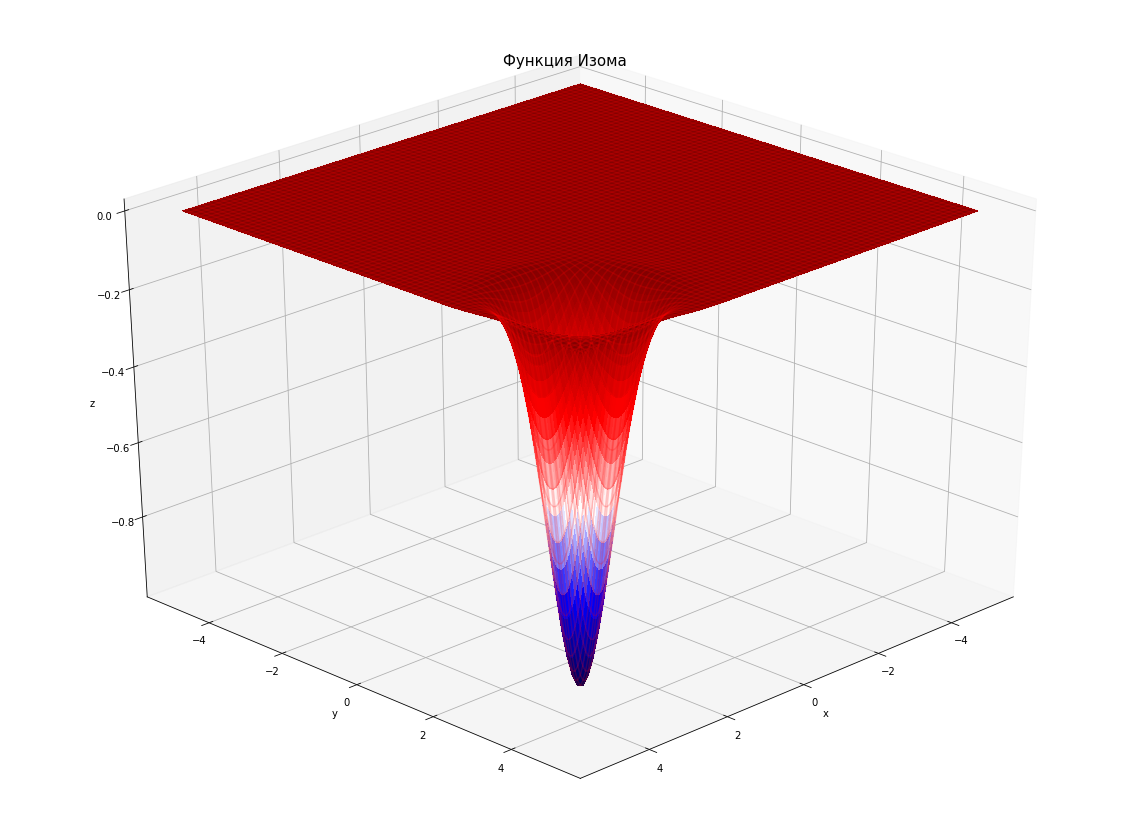

In [ ]:
Visualization.plot(Function.Izoma)

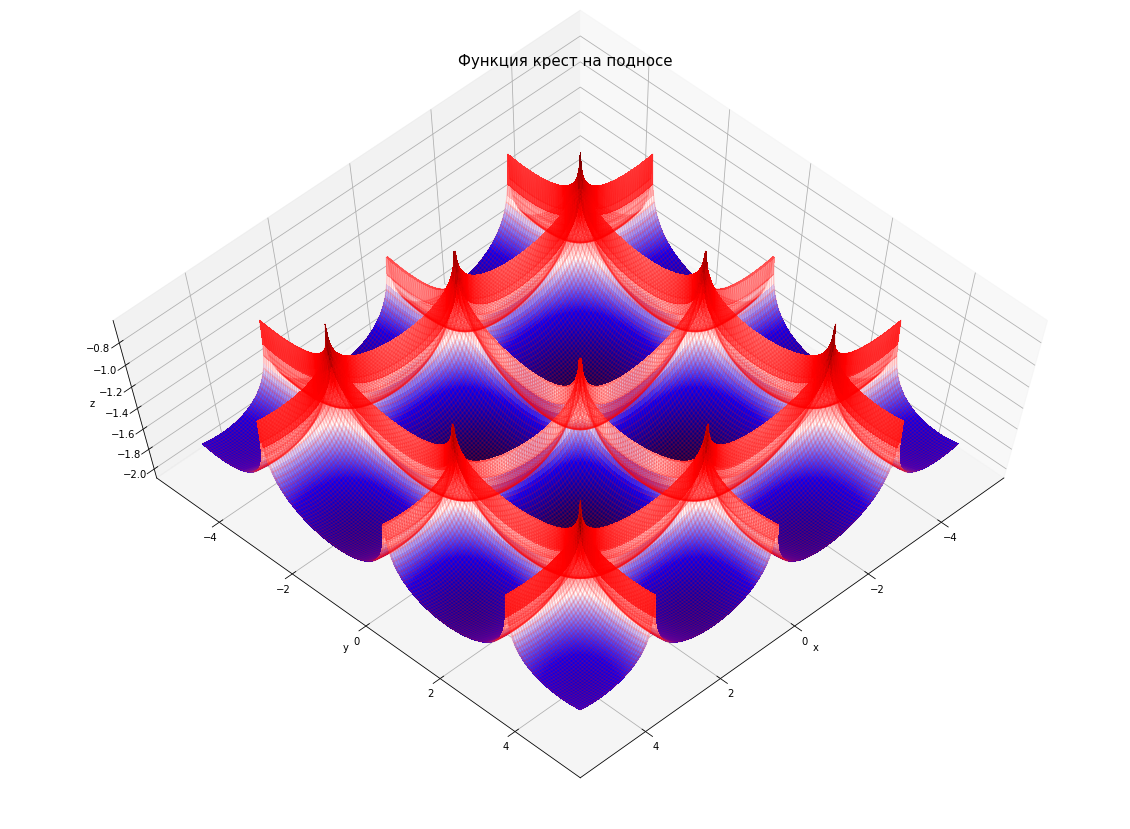

In [ ]:
Visualization.plot(Function.CrossInTtray)

##Демонстрация работы алгоритма Искусственная пчелиная семья (АВС)

In [ ]:
gen_count, pop_count = 500, 300

algo = pg.algorithm(pg.bee_colony(gen = gen_count))
prob = pg.problem(gmo_Izoma())
pop = pg.population(prob, pop_count)
pop = algo.evolve(pop)

gmo_answer_Izoma = [gmo_x, gmo_y, gmo_z] = [pop.champion_x[0], pop.champion_x[1], pop.champion_f[0]]
print("Результат работы генетического алгоритма для\
 функции Изома: [~x, ~y, ~z] = ", gmo_answer_Izoma )
###-----------------------------------------------------------------------------
gen_count, pop_count = 500, 300

algo = pg.algorithm(pg.bee_colony(gen = gen_count))
prob = pg.problem(gmo_CrossInTtray())
pop = pg.population(prob, pop_count)
pop = algo.evolve(pop)

gmo_answer_CrossInTtray = [gmo_x, gmo_y, gmo_z] = [pop.champion_x[0], pop.champion_x[1], pop.champion_f[0]]
print("Результат работы генетического алгоритма для функции крест на подносе: [~x, ~y, ~z] = ", gmo_answer_CrossInTtray )

Результат работы генетического алгоритма для функции Изома: [~x, ~y, ~z] =  [3.14159265834815, 3.1415926587344343, -1.0]
Результат работы генетического алгоритма для функции крест на подносе: [~x, ~y, ~z] =  [1.3494066068328712, 1.3494066224872054, -2.0626118708227397]


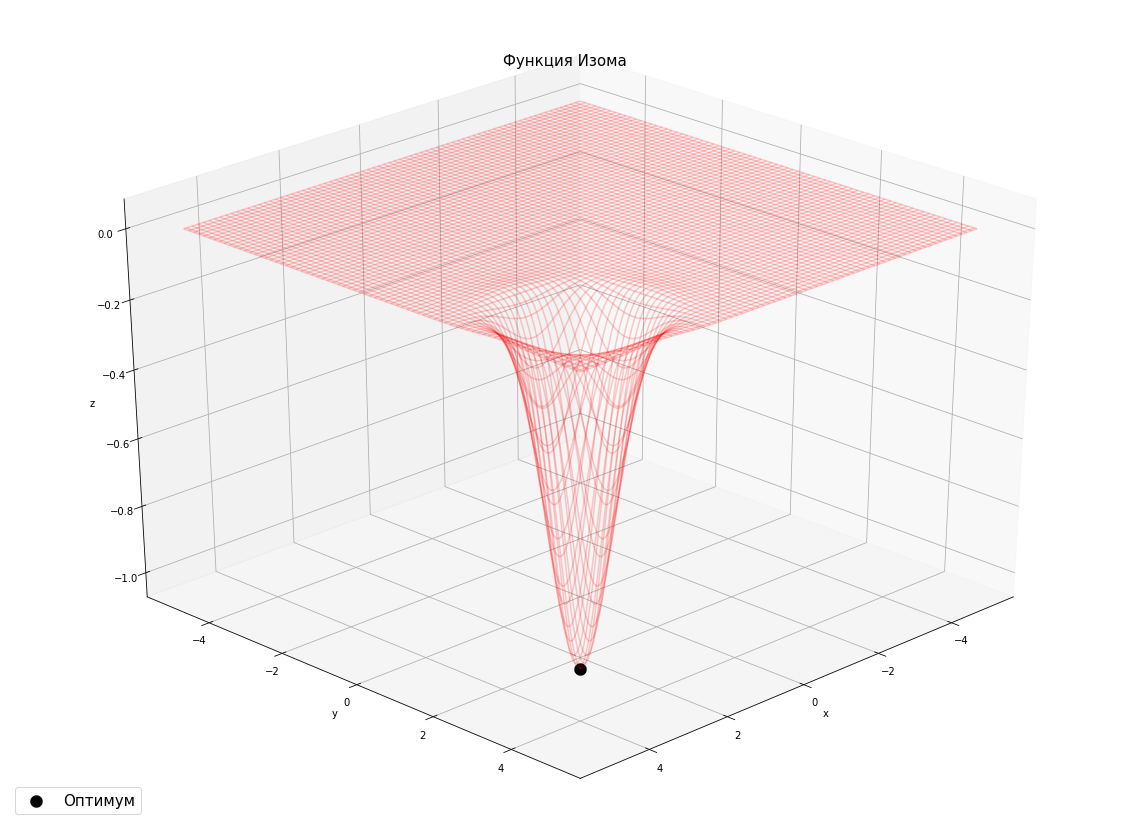

In [ ]:
Visualization.plot(Function.Izoma, gmo_answer_Izoma)

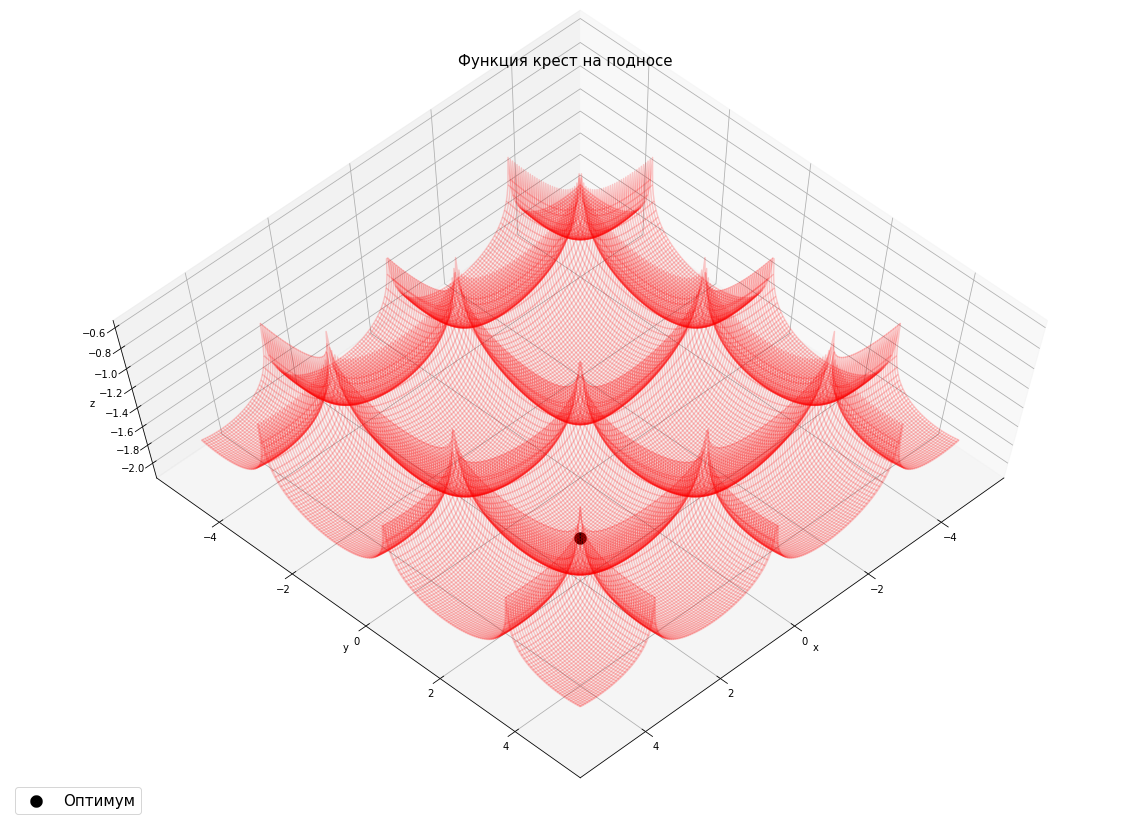

In [ ]:
Visualization.plot(Function.CrossInTtray, gmo_answer_CrossInTtray)

##Демонстрация работы алгоритма Стратегии экспоненциальной эволюции (xNES)

In [ ]:
gen_count, pop_count = 500, 300

algo = pg.algorithm(pg.xnes(gen = gen_count))
prob = pg.problem(gmo_Izoma())
pop = pg.population(prob, pop_count)
pop = algo.evolve(pop)

gmo_answer_Izoma = [gmo_x, gmo_y, gmo_z] = [pop.champion_x[0], pop.champion_x[1], pop.champion_f[0]]
print("Результат работы генетического алгоритма для функции Изома: [~x, ~y, ~z] = ", gmo_answer_Izoma )
###-----------------------------------------------------------------------------

gen_count, pop_count = 500, 300

algo = pg.algorithm(pg.xnes(gen = gen_count))
prob = pg.problem(gmo_CrossInTtray())
pop = pg.population(prob, pop_count)
pop = algo.evolve(pop)

gmo_answer_CrossInTtray = [gmo_x, gmo_y, gmo_z] = [pop.champion_x[0], pop.champion_x[1], pop.champion_f[0]]
print("Результат работы генетического алгоритма для функции крест на подносе: [~x, ~y, ~z] = ", gmo_answer_CrossInTtray )

Результат работы генетического алгоритма для функции Изома: [~x, ~y, ~z] =  [3.1415985424001236, 3.1415953809795467, -0.9999999999368249]
Результат работы генетического алгоритма для функции крест на подносе: [~x, ~y, ~z] =  [1.3493995968053027, 1.3494112066126347, -2.062611870813956]


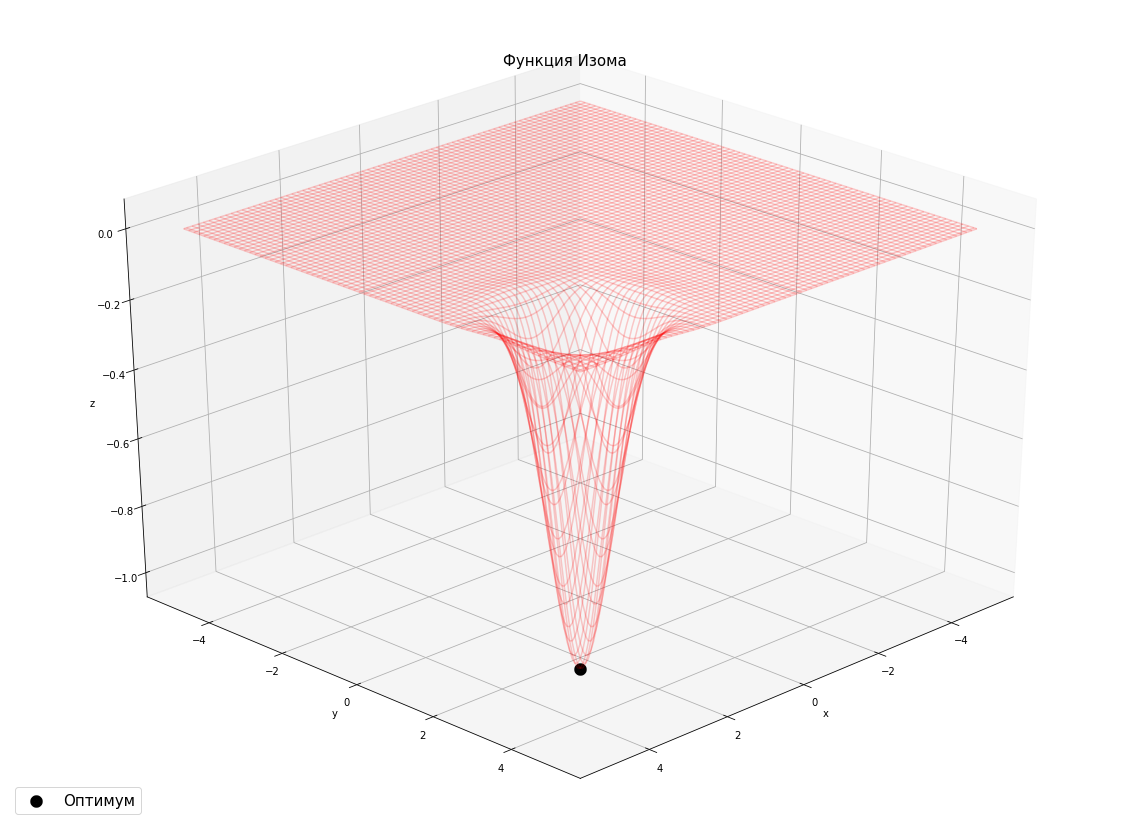

In [ ]:
Visualization.plot(Function.Izoma, gmo_answer_Izoma)

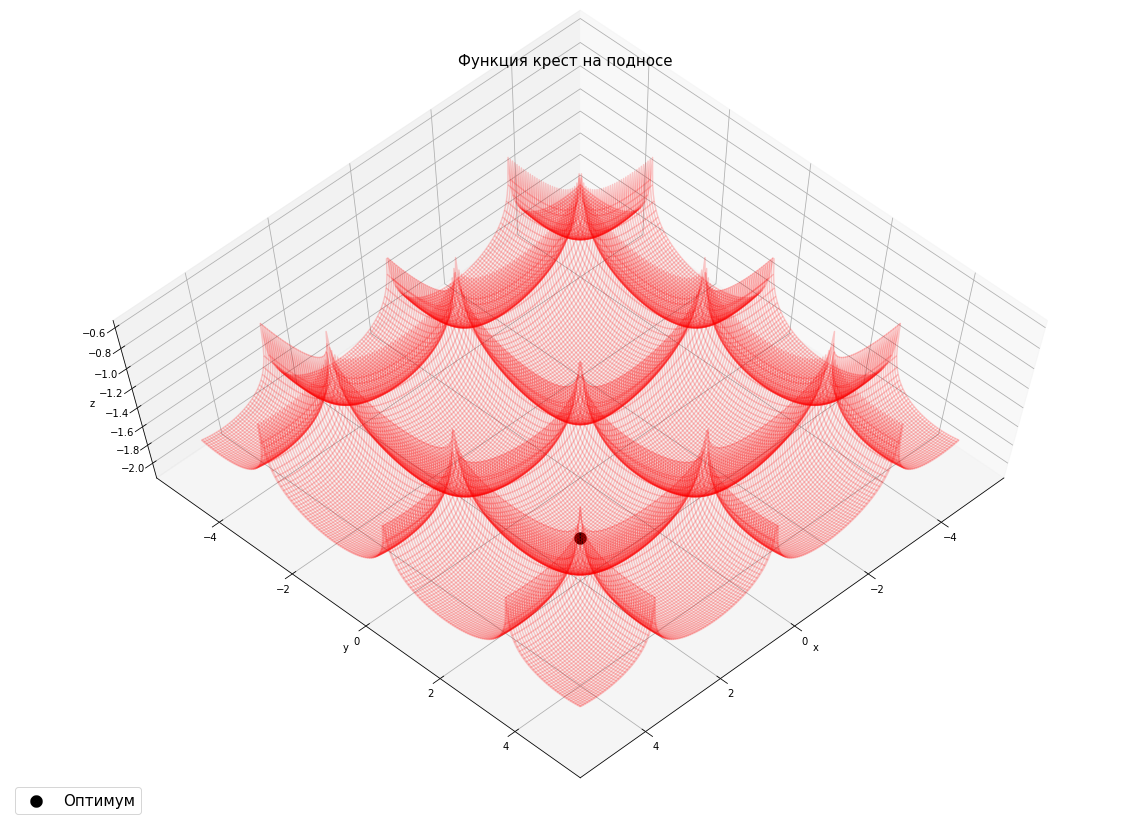

In [ ]:
Visualization.plot(Function.CrossInTtray, gmo_answer_CrossInTtray)

#Пункт 2 -> OneMax

In [ ]:
gen_count = 1000 
pop_count = 100 

value = '0111010001111101111001111'

algo = pg.algorithm(pg.bee_colony(gen = gen_count))
prob = pg.problem(OneMax(value))
pop = pg.population(prob, pop_count)
pop = algo.evolve(pop)
print("Правильный ответ:", value.count('1'))
print("Результат работы генетического алгоритма для задачи OneMax:",
      -pop.champion_f[0])


Правильный ответ: 17
Результат работы генетического алгоритма для задачи OneMax: 17.0
